# Set up environment

## Miniconda, biopython, openMM, pdbfixer

### install miniconda for Colab

ref: https://towardsdatascience.com/conda-google-colab-*75f7c867a522
- current python version: 3.6.9
- most recent compatible miniconda verison: 4.5.4

In [1]:
!which python
!python --version
!echo $PYTHONPATH

#remove python path to avoid conda warnings
%env PYTHONPATH=

/usr/local/bin/python
Python 3.6.13 :: Anaconda, Inc.
/env/python
env: PYTHONPATH=


In [2]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget -nc https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

File ‘Miniconda3-4.5.4-Linux-x86_64.sh’ already there; not retrieving.

Python 3.6.5 :: Anaconda, Inc.


Check for correct installation:

In [3]:
# should return /usr/local/bin/conda
!which conda

# should return 4.5.4
!conda --version

#Miniconda actually installed a slightly different version of Python
!python --version

/usr/local/bin/conda
conda 4.5.4
Python 3.6.5 :: Anaconda, Inc.


### Update conda

...and all its dependencies to their most recent versions without updating Python to 3.7 (or 3.8), i.e. holding the Python version at 3.6.

Since miniconda has a new version (4.10) that prevents me from importing simtk, I have to ensure it only uses 4.9.2 version (the one this notebook was originally running with) and avoid automatic updates.

In [4]:
!conda install conda=4.9.2  --yes

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 
  - defaults::conda-package-handling-1.7.3-py36h27cfd23_1.conda
  - defaults::conda-package-handling-1.7.3-py36h27cfd23_1done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda=4.9.2


The following packages will be downloaded:

    package              

In [5]:
!conda --version

conda 4.9.2


In [6]:
!pip install tqdm

cryptography 3.3.2 has requirement cffi>=1.12, but you'll have cffi 1.11.5 which is incompatible.


In [7]:
%%bash
conda install --channel defaults conda=4.9.2 python=3.6 --yes
conda update --channel defaults conda=4.9.2 --all --yes

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda=4.9.2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pycparser-2.20             |             py_2          94 KB
    requests-2.25.1            |     pyhd3eb1b0_0          52 KB
    urllib3-1.26.4             |     pyhd3eb1b0_0         105 KB
    wheel-0.36.2               |     pyhd3eb1b0_0          33 KB
    xz-5.2.5                   |       h7b6447c_0         341 KB
    yaml-0.2.5                 |       h7b6447c_0          75 KB
    zlib-1.2.11                |       h7b6447c_3         103 KB
    ------------------------------------------------------------
                                           Total:         804 KB

The following packages will be REMOVED:

 



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda




==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda




Check for correct update:

In [8]:
# now returns 4.9.2
!conda --version

# now returns Python 3.6.13 :: Anaconda, Inc.
!python --version 

conda 4.9.2
Python 3.6.13 :: Anaconda, Inc.


Any package that you install with Conda will be installed into the directory /usr/local/lib/python3.6/site-packages so you will need to add this directory to sys.path in order for these packages to be available for import.

Since the preinstalled packages included with Google Colab are installed into the /usr/local/lib/python3.6/dist-packages directory, which appears ahead, the version of a package available via Google Colab will take precedence over any version of the same package installed via Conda.

In [9]:
import sys
_ = (sys.path
        .append("/usr/local/lib/python3.6/site-packages"))

Install packages if necessary. include the --yes flag when installing your packages to avoid getting prompted to confirm the package plan.

In [10]:
# !conda install --channel conda-forge featuretools --yes

### Install bioptyhon, openMM, pdbfixer

In [11]:
!pip install biopython==1.78
# !conda install -c omnia openmm=7.3.1 pdbfixer=1.5 -y
# !conda install -c omnia pdbfixer=1.5 -y

**Ensure openmm and pdbfixer .so (shared library) are called with proper name: (to run if there is a loading problem with these two packages)**

In [12]:
!cp /usr/local/lib/python3.6/site-packages/simtk/openmm/_openmm.cpython-36m-x86_64-linux-gnu.so /usr/local/lib/python3.6/site-packages/simtk/openmm/_openmm.so
!ls /usr/local/lib/python3.6/site-packages/simtk/openmm/

cp: cannot stat '/usr/local/lib/python3.6/site-packages/simtk/openmm/_openmm.cpython-36m-x86_64-linux-gnu.so': No such file or directory
ls: cannot access '/usr/local/lib/python3.6/site-packages/simtk/openmm/': No such file or directory


In [13]:
!cp /usr/local/lib/python3.6/site-packages/Bio/Align/_aligners.cpython-36m-x86_64-linux-gnu.so /usr/local/lib/python3.6/site-packages/Bio/Align/_aligners.so
!ls /usr/local/lib/python3.6/site-packages/Bio/Align

_aligners.c				   AlignInfo.py  __pycache__
_aligners.cpython-36m-x86_64-linux-gnu.so  Applications  substitution_matrices
_aligners.so				   __init__.py


Ensure 3.6.13 version

In [14]:
py_version = !python -V
assert py_version[0].split(" ::")[0].split("Python ")[1] == "3.6.13"

For using Bio.PDB.skdtrees module (C script), one needs to first compile it (to i.e. translate to machine code), precising which python header file (used by GCC to build applications) with -I flag. -fPIC for "Position Independent Code", which means that the generated machine code is not dependent on being located at a specific address in order to work (e.g. C jumps would be generated as relative rather than absolute).

Once compiled, create a shared library file (".so" extension).

In [15]:
!gcc -I /usr/include/python3.6m/ -c -Wall -fPIC -o /usr/local/lib/python3.6/site-packages/Bio/PDB/kdtrees.o /usr/local/lib/python3.6/site-packages/Bio/PDB/kdtrees.c
!gcc -o /usr/local/lib/python3.6/site-packages/Bio/PDB/kdtrees.so -shared /usr/local/lib/python3.6/site-packages/Bio/PDB/kdtrees.o

## Mount drive

In [16]:
# Mount drive
from google.colab import drive

to_mount = True
while to_mount:
    try:
        drive.mount('/content/gdrive/', force_remount=True)
        to_mount=False
    except ValueError:
        print("New attempt to mount.")
        pass

Mounted at /content/gdrive/


## Import packages, modules

In [18]:
import glob
import os
import sys
import random
import timeit
import re
import pickle
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
from collections import OrderedDict
from torch.utils.data import DataLoader, Dataset

import tempfile
from io import BytesIO, StringIO

import Bio.PDB
import Bio.PDB.Polypeptide
import Bio.PDB.vectors
import Bio.SeqIO
from Bio.PDB.Polypeptide import index_to_one

# packages necessary for cleaning the PDB files (see cavity_model_pipeline.ipynb)
import simtk
import simtk.openmm
import simtk.openmm.app
import simtk.unit

os.chdir("gdrive/My Drive/deployment")

from cavity_model import (
    CavityModel,
    ResidueEnvironment,
    ResidueEnvironmentsDataset,
    DownstreamModel,
    ToTensor,
    DDGDataset,
    DDGToTensor,
    DownstreamModel,
)

from helpers import (
    _augment_with_reverse_mutation,
    _populate_dfs_with_nlls_and_nlfs,
    _populate_dfs_with_resenvs,
    _train_loop,
    _train_val_split,
    _get_ddg_training_dataloaders,
    _get_ddg_validation_dataloaders,
    _train_downstream_and_evaluate,
    _predict_with_downstream,
    _eval_loop
)

from visualization import scatter_pred_vs_true, plot_validation_performance

# Preprocess .pdb files

In [ ]:
from pdb_parser_scripts.clean_pdb_v2 import clean_pdb
from pdb_parser_scripts.extract_environments import extract_environments
# import pdb_parser_scripts.grid

import traceback
import pdbfixer

!chmod +x reduce/reduce
!chmod +x pdb_parser_scripts/clean_pdb.py
!chmod +x pdb_parser_scripts/extract_environments.py

In [ ]:
pdb_files = ["data/pdbs/raw/4oyy_chainA.pdb"]

In [ ]:
n_files = len(pdb_files)
fails = []
for i, pdb_filename in enumerate(pdb_files):
    try:

        clean_pdb(pdb_filename, "data/pdbs/cleaned", "reduce/reduce")

        pdb_filename = os.path.basename(pdb_filename)
        pdb_id = pdb_filename.split(".")[0]

        extract_environments(f"data/pdbs/cleaned/{pdb_id}_clean.pdb",
                            pdb_id=pdb_id,
                            out_dir="data/pdbs/parsed")
        print(f"{pdb_filename} cleaned & parsed successfully ({i+1}/{n_files})")
    except Exception:
        print(f"{pdb_filename} failed. Nb: {i+1}.")
        fails.append(pdb_filename)

        error_msg = traceback.format_exc()
        print(error_msg)

/usr/local/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2867
  PDBConstructionWarning,


4oyy_chainA.pdb cleaned & parsed successfully (1/1)


# Cavity + DS model

In [69]:
prot_interest = "4oyy_chainA"

# Create temporary residue environment datasets as dicts to more easily match ddG data
parsed_pdbs_wildcards = {
    prot_interest : f"data/pdbs/parsed/{prot_interest}_coordinate_features.npz", 
}


resenv_datasets_look_up = {}
for dataset_key, pdbs_wildcard in parsed_pdbs_wildcards.items():
    parsed_pdb_filenames = sorted(glob.glob(pdbs_wildcard))

    dataset = ResidueEnvironmentsDataset(parsed_pdb_filenames, transformer=None)
    dataset_look_up = {}
    for resenv in dataset:
        key = (
            f"{resenv.pdb_id}{resenv.chain_id}_{resenv.pdb_residue_number}"
            f"{index_to_one(resenv.restype_index)}" #  Index corresponding to one-letter-encoding amino acid.
        )
        dataset_look_up[key] = resenv
    resenv_datasets_look_up[dataset_key] = dataset_look_up # dict of datasets dict

In [70]:
# Consider all potential mutations 222 x 22
prot_infos = np.load(parsed_pdbs_wildcards[prot_interest])

seq_wt_index = np.argmax(prot_infos["aa_onehot"], axis=1)
chain_boundary_indices = prot_infos["chain_boundary_indices"]
res_numbers = prot_infos["residue_numbers"]

In [71]:
idx_to_one = Bio.PDB.Polypeptide.index_to_one

chainid = []
variant = []

for i, (res_nb, restype_idx) in enumerate(zip(res_numbers, seq_wt_index)):

    for j, boundary in enumerate(chain_boundary_indices):
        if i < boundary:
            chainid.extend([chr(65 + j-1) for _ in range(19)])
            break

    variant.extend([f"{idx_to_one(restype_idx)}{res_nb}{idx_to_one(x)}" for x in range(20) if x != restype_idx])

pd.DataFrame({"pdbid": prot_interest, "chainid": chainid, "variant": variant})

ddg_data_dict = OrderedDict()
ddg_data_dict[prot_interest] = pd.DataFrame({"pdbid": prot_interest.split("_")[0],
                                             "chainid": chainid,
                                             "variant": variant})

In [72]:
_populate_dfs_with_resenvs(ddg_data_dict, resenv_datasets_look_up)

Dropping data points where residue is not defined in structure or due to missing parsed pdb file
dropped    0 / 3629 data points from dataset 4oyy_chainA


In [73]:
DEVICE = "cuda"
BATCH_SIZE = 10
EPS = 1e-9

# Load best performing cavity model from previos training
cavity_model_infer_net = CavityModel(DEVICE).to(DEVICE)
cavity_model_infer_net.load_state_dict(torch.load("models/cavity_model.pt"))
cavity_model_infer_net.eval()

_populate_dfs_with_nlls_and_nlfs( # performs the predictions and does IN PLACE modification of the ddg_data_dict dataset (does not RETURN anything)
    ddg_data_dict, cavity_model_infer_net, DEVICE, BATCH_SIZE, EPS
)

ddg_data_dict[prot_interest].rename({"ddg_pred_no_ds": "ddg"},
                                    axis=1,
                                    inplace=True)

In [74]:
# load downstream model
downstream_model_net = DownstreamModel().to(DEVICE)
# downstream_model_net = DownstreamModel().to(DEVICE)

# downstream_model_net.eval()
downstream_model_net.load_state_dict(torch.load("models/ds_model_mayo.pt"))

# get validation dataloader
ddg_dataloaders_val_dict = _get_ddg_validation_dataloaders(ddg_data_dict)

# get predictions
ddg_pred = _predict_with_downstream(ddg_dataloaders_val_dict,
                                    downstream_model_net,
                                    DEVICE)

for prot_family in ddg_pred.keys():
    ddg_data_dict[prot_family]["ddg_ds_mayo"] = ddg_pred[prot_family]

Done validating 4oyy_chainA dataset.


In [ ]:
# load downstream model
downstream_model_net = DownstreamModel().to(DEVICE)
# downstream_model_net = DownstreamModel().to(DEVICE)

# downstream_model_net.eval()
downstream_model_net.load_state_dict(torch.load("models/ds_model_guerois.pt"))

# get validation dataloader
ddg_dataloaders_val_dict = _get_ddg_validation_dataloaders(ddg_data_dict)

# get predictions
ddg_pred = _predict_with_downstream(ddg_dataloaders_val_dict,
                                    downstream_model_net,
                                    DEVICE)

for prot_family in ddg_pred.keys():
    ddg_data_dict[prot_family]["ddg_ds_guerois"] = ddg_pred[prot_family]

Done validating 4oyy_chainA dataset.


In [ ]:
# ddg_data_dict[prot_family].to_csv(f"results/{prot_interest}.csv", index=False)

# Visualize results

## Requirements for stability analyses

In [ ]:
!rm -rf /usr/local/lib/python3.6/site-packages/*ruamel_yaml*
!rm -rf /usr/local/lib/python3.6/site-packages/ruamel*
!pip install ssbio

In [ ]:
!conda install -c salilab dssp -y

In [ ]:
# Source code for ssbio.protein.structure.properties.dssp from: https://ssbio.readthedocs.io/en/latest/_modules/ssbio/protein/structure/properties/dssp.html
# the code takes a pdb file, runs DSSP on it, turns it into a csv file (.dssp.df) i.e. returns a dataframe.
import logging
import ssbio.utils # structural systems biology tools
from collections import defaultdict
from six import iteritems
from Bio.PDB.DSSP import dssp_dict_from_pdb_file
from Bio.PDB.DSSP import residue_max_acc
from Bio.PDB.Polypeptide import aa1
from Bio.PDB.Polypeptide import one_to_three
log = logging.getLogger(__name__)

# for plotting
import plotly 
import plotly.graph_objs as go
from plotly.offline import iplot #offline


def get_dssp_df_on_file(pdb_file, outfile=None, outdir=None, outext='_dssp.df', force_rerun=False):
    """Run DSSP directly on a structure file with the Biopython method Bio.PDB.DSSP.dssp_dict_from_pdb_file

    Avoids errors like: PDBException: Structure/DSSP mismatch at <Residue MSE het=  resseq=19 icode= >
    by not matching information to the structure file (DSSP fills in the ID "X" for unknown residues)

    Args:
        pdb_file: Path to PDB file
        outfile: Name of output file
        outdir: Path to output directory
        outext: Extension of output file
        force_rerun: If DSSP should be rerun if the outfile exists

    Returns:
        DataFrame: DSSP results summarized

    """
    # TODO: function unfinished
    # Create the output file name
    outfile = ssbio.utils.outfile_maker(inname=pdb_file, outname=outfile, outdir=outdir, outext=outext)

    if ssbio.utils.force_rerun(flag=force_rerun, outfile=outfile):
        try:
            d = dssp_dict_from_pdb_file(pdb_file)
            
        except: #  Exception('DSSP failed to produce an output')
            log.error('{}: unable to run DSSP'.format(pdb_file))
            return pd.DataFrame()

        appender = []
        # TODO: WARNING: d is slightly different than when using function get_dssp_df
        
        for k in d[1]:
            to_append = []
            y = d[0][k]
            chain = k[0]
            residue = k[1]
            het = residue[0]
            resnum = residue[1]
            icode = residue[2]
            to_append.extend([chain, resnum, icode])
            to_append.extend(y)
            appender.append(to_append)

        cols = ['chain', 'resnum', 'icode',
                'aa', 'ss', 'exposure_rsa', 'phi', 'psi', 'dssp_index',
                'NH_O_1_relidx', 'NH_O_1_energy', 'O_NH_1_relidx',
                'O_NH_1_energy', 'NH_O_2_relidx', 'NH_O_2_energy',
                'O_NH_2_relidx', 'O_NH_2_energy']
      
        df = pd.DataFrame.from_records(appender, columns=cols)

        # Adding additional columns
        df = df[df['aa'].isin(list(aa1))]
        df['aa_three'] = df['aa'].apply(one_to_three)
        df['max_acc'] = df['aa_three'].map(residue_max_acc['Sander'].get) # use 'Sander', 'Wilke', or 'Miller, dictionnary of ASA (accessible surface area)
        df[['exposure_rsa', 'max_acc']] = df[['exposure_rsa', 'max_acc']].astype(float)
        df['exposure_asa'] = df['exposure_rsa'] * df['max_acc']

        df.to_csv(outfile)
    else:
        log.debug('{}: already ran DSSP and force_rerun={}, loading results'.format(outfile, force_rerun))
        df = pd.read_csv(outfile, index_col=0)

    return df


def secondary_structure_summary(dssp_df):
    """Summarize the secondary structure content of the DSSP dataframe for each chain.

    Args:
        dssp_df: Pandas DataFrame of parsed DSSP results

    Returns:
        dict: Chain to secondary structure summary dictionary

    """
    chains = dssp_df.chain.unique()

    infodict = {}
    for chain in chains:
        expoinfo = defaultdict(int)
        chain_df = dssp_df[dssp_df.chain == chain]
        counts = chain_df.ss.value_counts()
        total = float(len(chain_df))

        for ss, count in iteritems(counts):
            if ss == '-':
                expoinfo['percent_C-dssp'] = count/total
            if ss == 'H':
                expoinfo['percent_H-dssp'] = count/total
            if ss == 'B':
                expoinfo['percent_B-dssp'] = count/total
            if ss == 'E':
                expoinfo['percent_E-dssp'] = count/total
            if ss == 'G':
                expoinfo['percent_G-dssp'] = count/total
            if ss == 'I':
                expoinfo['percent_I-dssp'] = count/total
            if ss == 'T':
                expoinfo['percent_T-dssp'] = count/total
            if ss == 'S':
                expoinfo['percent_S-dssp'] = count/total

        # Filling in 0 percenters
        for per in ['percent_C-dssp','percent_H-dssp','percent_B-dssp','percent_E-dssp',
                    'percent_G-dssp','percent_I-dssp','percent_T-dssp','percent_S-dssp']:
            if per not in expoinfo:
                expoinfo[per] = 0.0

        infodict[chain] = dict(expoinfo)

    return infodict


# TODO: below methods have not been fixed
def calc_surface_buried(dssp_df):
    '''Calculates the percent of residues that are in the surface or buried,
    as well as if they are polar or nonpolar. Returns a dictionary of this.
    '''
    SN = 0
    BN = 0
    SP = 0
    SNP = 0
    SPo = 0
    SNe = 0
    BNP = 0
    BP = 0
    BPo = 0
    BNe = 0
    Total = 0

    sbinfo = {}

    df_min = dssp_df[['aa_three', 'exposure_asa']]

    if len(df_min) == 0:
        return sbinfo
    else:
        for i, r in df_min.iterrows():
            res = r.aa_three
            area = r.exposure_asa
            if res in AAdict:
                if AAdict[res] == 'nonpolar' and area > 3:
                    SNP = SNP + 1
                    SN = SN + 1
                elif AAdict[res] == 'polar' and area > 3:
                    SP = SP + 1
                    SN = SN + 1
                elif AAdict[res] == 'positive' and area > 3:
                    SPo = SPo + 1
                    SN = SN + 1
                elif AAdict[res] == 'negative' and area > 3:
                    SNe = SNe + 1
                    SN = SN + 1
                elif AAdict[res] == 'positive' and area <= 3:
                    BPo = BPo + 1
                    BN = BN + 1
                elif AAdict[res] == 'negative' and area <= 3:
                    BNe = BNe + 1
                    BN = BN + 1
                elif AAdict[res] == 'polar' and area <= 3:
                    BP = BP + 1
                    BN = BN + 1
                elif AAdict[res] == 'nonpolar' and area <= 3:
                    BNP = BNP + 1
                    BN = BN + 1
        Total = float(BN + SN)
        pSNP = float(SNP) / Total
        pSP = float(SP) / Total
        pSPo = float(SPo) / Total
        pSNe = float(SNe) / Total
        pBNP = float(BNP) / Total
        pBP = float(BP) / Total
        pBPo = float(BPo) / Total
        pBNe = float(BNe) / Total
        pBN = float(BN) / Total
        pSN = float(SN) / Total
        sbinfo['ssb_per_S_NP'] = pSNP
        sbinfo['ssb_per_S_P'] = pSP
        sbinfo['ssb_per_S_pos'] = pSPo
        sbinfo['ssb_per_S_neg'] = pSNe
        sbinfo['ssb_per_B_NP'] = pBNP
        sbinfo['ssb_per_B_P'] = pBP
        sbinfo['ssb_per_B_pos'] = pBPo
        sbinfo['ssb_per_B_neg'] = pBNe
        sbinfo['ssb_per_S'] = pSN
        sbinfo['ssb_per_B'] = pBN

        return sbinfo


def calc_sasa(dssp_df):
    """
    Calculation of SASA utilizing the DSSP program.

    DSSP must be installed for biopython to properly call it.
    Install using apt-get on Ubuntu
    or from: http://swift.cmbi.ru.nl/gv/dssp/

    Input: PDB or CIF structure file
    Output: SASA (integer) of structure
    """

    infodict = {'ssb_sasa': dssp_df.exposure_asa.sum(),
                'ssb_mean_rel_exposed': dssp_df.exposure_rsa.mean(),
                'ssb_size': len(dssp_df)}

    return infodict


def all_dssp_props(filename, file_type):
    '''Returns a large dictionary of SASA, secondary structure
    composition, and surface/buried composition. Values are computed using DSSP.
    Input: PDB or MMCIF filename
    Output: Dictionary of values obtained from dssp
    '''
    t = dssp_dataframe(filename, file_type)
    # print(t)
    sasa = calc_sasa(t)
    sstr = secondary_structure_summary(t)
    subu = calc_surface_buried(t)

    sasa.update(sstr)
    sasa.update(subu)

    return sasa


def get_ss_class(pdb_file, dssp_file, chain):
    """Define the secondary structure class of a PDB file at the specific chain

    Args:
        pdb_file:
        dssp_file:
        chain:

    Returns:

    """
    prag = pr.parsePDB(pdb_file)
    pr.parseDSSP(dssp_file, prag)
    alpha, threeTen, beta = get_dssp_ss_content_multiplechains(prag, chain)

    if alpha == 0 and beta > 0:
        classification = 'all-beta'
    elif beta == 0 and alpha > 0:
        classification = 'all-alpha'
    elif beta == 0 and alpha == 0:
        classification = 'mixed'
    elif float(alpha) / beta >= 20:
        classification = 'all-alpha'
    else:
        classification = 'mixed'

    return classification

# Change of stability landscape

In [ ]:
prot_name = "4oyy_chainA"

df = pd.read_csv(f"results/{prot_name}.csv")

df["resnum"] = df.variant.apply(lambda x: int(x[1:-1]))
df["aa"] = df.variant.apply(lambda x: x[0])
df["to"] = df.variant.apply(lambda x: x[-1])

In [ ]:
dssp = get_dssp_df_on_file(f"./data/pdbs/cleaned/{prot_name}_clean.pdb",
                           force_rerun=True)

# adding the relative accessibility to the DSSP dataframe
dssp['rel_acc'] = dssp['exposure_rsa']/dssp['max_acc'] # WHERE REL_ACC REPRENSENTS THE PROPORTION OF RSA, NOT RSA ITSELF

# Defining cutoffs for classification of the positions into core, boundary and surface
classification = []
for i in dssp['rel_acc']:
    if i < 0.1:
        classification.append('core')
    if 0.1 <= i < 0.4:
        classification.append('boundary')
    if i >= 0.4:
        classification.append('surface')

# adding the classifications as a column to the dssp dataframe
dssp['classification'] = classification

# Merge dssp info with df variants
df = pd.merge(df, dssp, how='left', on=['resnum','aa'])

In [ ]:
def get_xlabels(resnum, aa):
    if resnum < 9:
        return f" {resnum} {aa}"
    else:
        return f"{resnum} {aa}"

wt_seq = df[["resnum", "aa"]].drop_duplicates(

    ).apply(lambda x: get_xlabels(x['resnum'], x['aa']), axis=1
    ).to_numpy()

In [ ]:
aa_to_feature_mapper = {
    "D": "acidic", "E": "acidic",
    "H": "basic", "K": "basic", "R": "basic",
    "A": "hydrophobic", "F": "hydrophobic", "I": "hydrophobic", "L": "hydrophobic", "M": "hydrophobic", "V": "hydrophobic", "Y": "hydrophobic", "W": "hydrophobic",
    "N": "polar", "Q": "polar", "S": "polar", "T": "polar",
    "G": "special", "P": "special", "C": "special",
    }

df["aa_feature"] = df["to"].apply(lambda x: aa_to_feature_mapper[x])

# Specify order of target residues:
aa_order = ["D", "E", "H", "K", "R", "A", "F", "I", "L", "M", "V", "Y", "W", "N", "Q", "S", "T", "G", "P", "C"]
dict_aa_order = {}
for i, aa in enumerate(aa_order):
    dict_aa_order[aa] = i
df = df.sort_values(by="to", key=lambda x: x.map(dict_aa_order))

In [ ]:
dir_path = "results"
list_ddg_dddg_cols = ["ddg", "ddg_ds_mayo", "ddg_ds_guerois"]
list_titles = ["Cavity model",
               "Cavity + DS (Mayo) models",
               "Cavity + DS (Guerois) models"]
ddg_labels = ["\u0394\u0394G (kcal/mol)"]*3

In [ ]:
df.sort_values(by=["resnum", "aa", "to"])[["resnum", "aa", "to", "ddg_ds_mayo"]][:19]

In [ ]:
# Get the indexes of the core residues
list_core_pos = np.array(df[df["classification"] == "core"]["resnum"].unique() - 1)

# mask of indices not in core
mask = np.ones_like(wt_seq, dtype=bool)
mask[list_core_pos] = False

# get the plot with plotly and the proper layout (tip: two heatmap traces)
xrange_ = np.arange(df.resnum.min(), df.resnum.max()+1)

for ddg_value, title, label in zip(list_ddg_dddg_cols, list_titles, ddg_labels):
    print(title)
    trace = [go.Heatmap(
        x = df['resnum'],
        y = [df["aa_feature"], df['to']],
        z = df[ddg_value],
        type = 'heatmap',
        colorscale = 'RdBu_r',
        zmid=0,
        colorbar={"title":label, "titleside":"right", "tickangle":-90}
    ), go.Heatmap(xaxis='x2')]
    # data = trace
    layout = go.Layout(
        xaxis=dict( # core positions
            range=[xrange_[0]-0.5, xrange_[-1]+0.5],
            title="G\u03B21 primary structure",
            tickfont=dict(color="#1f77b4"),
            tickmode="array",
            tickangle=-90,
            tickvals=list(xrange_[mask]),
            ticktext=list(wt_seq[mask])
            ),
        xaxis2=dict( # non-core positions
            range=[xrange_[0]-0.5, xrange_[-1]+0.5],
            tickfont=dict(color="#ff7f0e"),
            tickmode="array",
            tickangle=-90,
            tickvals=list(xrange_[~mask]),
            ticktext=list(wt_seq[~mask]),
            overlaying="x"
            ),
        yaxis=dict(
            title="Target",
            tickangle=-90
            ),
        # title=title
        )
    fig = go.Figure(data=trace, layout=layout)
    fig.write_html(f"{dir_path}/heatmap_{ddg_value}_{prot_name}.html")
    fig.show()

Cavity model


Cavity + DS (Mayo) models


Cavity + DS (Guerois) models


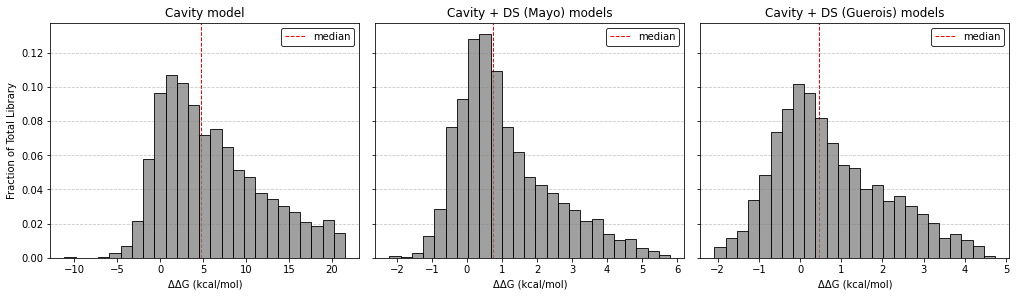

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4),
                         constrained_layout=True, sharey=True)

for i, (ax, ddg_value, title) in enumerate(zip(axes, list_ddg_dddg_cols[:5], list_titles[:5])):
    x = pd.Series(df[ddg_value], name='\u0394\u0394G (kcal/mol)')
    sns.histplot(x, kde=False, bins=25, stat="probability",
                 color="grey", edgecolor='black',
                 ax=ax,
                 zorder=10).set(ylabel="Fraction of Total Library")
    ax.axvline(x.median(), color='r', linestyle='dashed', linewidth=1, label="median")
    ax.grid(axis="y", linestyle='dashed', alpha=0.7)
    legend = ax.legend()
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    ax.set_title(title)
plt.savefig(f"{dir_path}/stability_distribution_{prot_name}.png", dpi=200, bbox_inches = "tight")
plt.show()

## Save predictions in .csv file

In [ ]:
df.sort_values(by=["resnum", "aa", "to"])[["pdbid", "chainid", "variant", "ddg", "ddg_ds_mayo", "ddg_ds_guerois"]].to_csv(f"{dir_path}/{prot_name}_cav_model_pred.csv", index=False)